In [1]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as war
war.filterwarnings('ignore')
pd.set_option('max_columns',None)

In [2]:
# load dataset
df = pd.read_csv('bank.csv',sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
# load txt file for information
with open('bank-names.txt','r') as data:
    info = data.read()
    print(info)

Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, GuimarÃ£es, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and SÃ©rgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European

In [4]:
# check information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


# Handle Null And Duplicate Values

In [5]:
# check null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
# check duplicate values
df.duplicated().sum()

0

**We Can Clearly See There Are No Any Null And Duplicate Values Are Present**

# Check Unique Values And Values Count For Every Categorical Column

In [7]:
# check unique values and values count for job column
df.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [8]:
# check unique values and values count for marital column
df.marital.value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [9]:
# check unique values and values count for education column
df.education.value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [10]:
# check unique values and values count for default column
df.default.value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [11]:
# check unique values and values count for housing column
df.housing.value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

In [12]:
# check unique values and values count for loan column
df.loan.value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [13]:
# check unique values and values count for contact column
df.contact.value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [14]:
# check unique values and values count for month column
df.month.value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [15]:
# check unique values and values count for poutcome column
df.poutcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [16]:
# check unique values and values count for y column
df.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [17]:
# value distribution for target column
(df.y.value_counts()/len(df.y)) * 100

no     88.476001
yes    11.523999
Name: y, dtype: float64

**We Can Clearly See Our Data Set Is Imbalanced, In Target Column More Than 88% Data Comes With No And Only 11% Data Comes With Yes**

# Handle Outliers

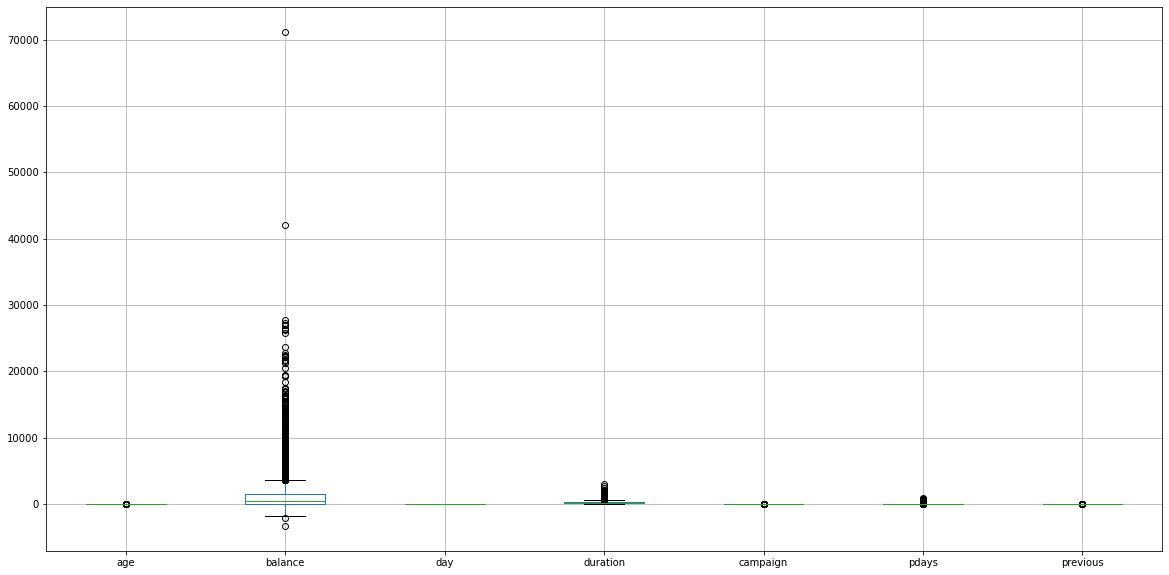

In [18]:
# check outliers with boxplot
plt.figure(figsize = (20,10))
df.boxplot()
plt.show()

**We Can See Only In Balance Column There Are High Amount Of Outliers Present, But Rest Of The Column Comes With Low Amount Of Outliers, For More Clearity We Will Use IQR Method**

In [19]:
# find lower and upper limit with iqr for balance column
first_quantile = df['balance'].quantile(0.25)
third_quantile = df['balance'].quantile(0.75)
iqr = third_quantile - first_quantile
lower_limit = first_quantile - 1.5 * iqr
upper_limit = third_quantile + 1.5 * iqr
lower_limit,upper_limit

(-2047.5, 3596.5)

In [20]:
# check how many values are below from the lower limit and above from the upper limit in balance column
df[(df['balance']<=lower_limit) | (df['balance']>=upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
10,39,services,married,secondary,no,9374,yes,no,unknown,20,may,273,1,-1,0,unknown,no
16,56,technician,married,secondary,no,4073,no,no,cellular,27,aug,239,5,-1,0,unknown,no
25,41,management,married,tertiary,no,5883,no,no,cellular,20,nov,182,2,-1,0,unknown,no
30,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4464,53,services,divorced,secondary,no,4554,no,no,cellular,5,feb,8,6,-1,0,unknown,no
4473,33,technician,married,secondary,no,4790,yes,no,cellular,20,apr,137,1,272,2,failure,no
4489,45,management,married,tertiary,no,6945,no,no,cellular,5,aug,131,5,356,3,failure,no
4500,38,admin.,married,secondary,no,4196,yes,no,cellular,12,may,193,2,-1,0,unknown,no


In [21]:
# lenth of outliers 
out = len(df[(df['balance']<=lower_limit) | (df['balance']>=upper_limit)])
out

506

In [22]:
# lenth of outliers with target column values
out_tar = len(df[((df['balance']<=lower_limit) | (df['balance']>=upper_limit)) & (df['y'] == 'no')])
out_tar

434

In [23]:
# percentage of outliers with target value no
(out_tar/out) * 100

85.7707509881423

**We Can Clearly See More Than 85% Of Outlers Comes With Target Value No, It Is Happening Because Our Dataset Is Imbalanced, So We Can't Consider It To Be Outliers**

# Exploratory Data Analysis

## Feature Distribution

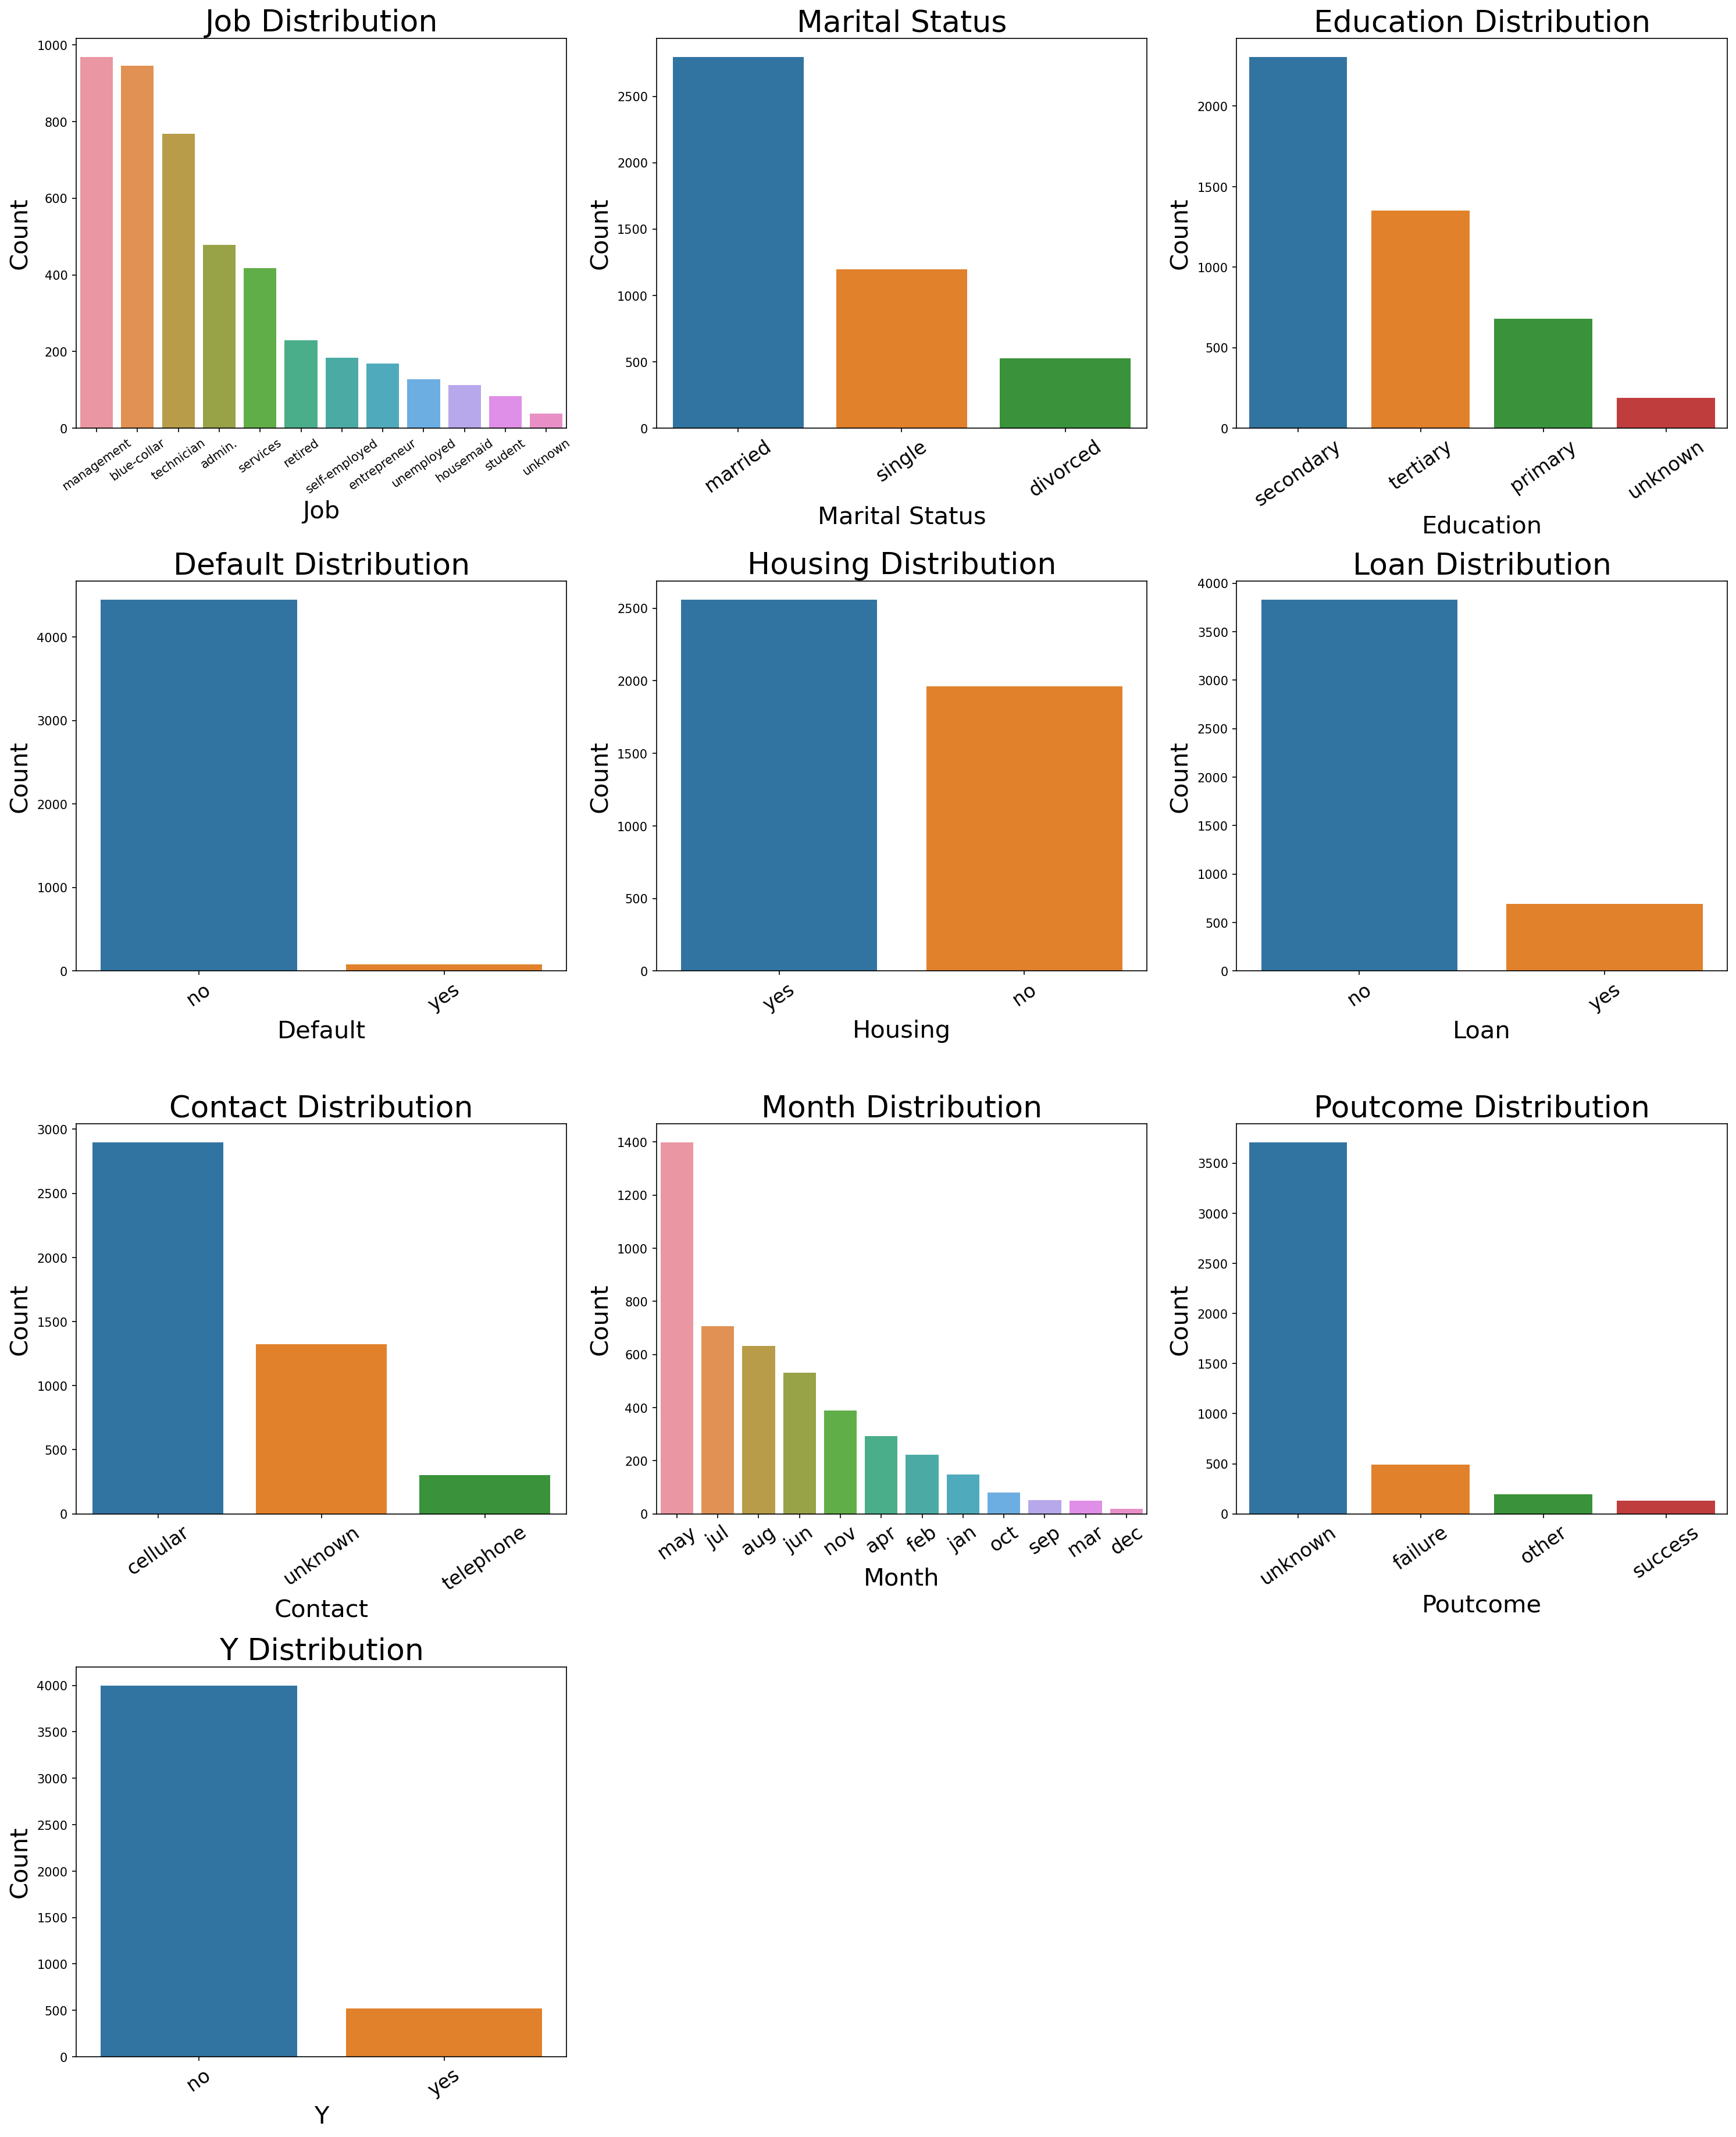

In [24]:
# categorical features

# job
plt.figure(figsize=(20, 30), dpi=150)
plt.subplot(5,3,1)
sns.countplot(df['job'],order=df.job.value_counts().index)
plt.title("Job Distribution", fontsize = 25)
plt.xlabel("Job",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 35)

# marital
plt.subplot(5,3,2)
sns.countplot(df['marital'],order=df.marital.value_counts().index)
plt.title("Marital Status", fontsize = 25)
plt.xlabel("Marital Status",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 35,fontsize = 16)

# education
plt.subplot(5,3,3)
sns.countplot(df['education'],order=df.education.value_counts().index)
plt.title("Education Distribution", fontsize = 25)
plt.xlabel("Education",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 35,fontsize = 16)

# default
plt.subplot(5,3,4)
sns.countplot(df['default'],order=df.default.value_counts().index)
plt.title("Default Distribution", fontsize = 25)
plt.xlabel("Default",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 35,fontsize = 16)

# housing
plt.subplot(5,3,5)
sns.countplot(df['housing'],order=df.housing.value_counts().index)
plt.title("Housing Distribution", fontsize = 25)
plt.xlabel("Housing",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 35,fontsize = 16)

# loan
plt.subplot(5,3,6)
sns.countplot(df['loan'],order=df.loan.value_counts().index)
plt.title("Loan Distribution", fontsize = 25)
plt.xlabel("Loan",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 35,fontsize = 16)

# contact
plt.subplot(5,3,7)
sns.countplot(df['contact'],order=df.contact.value_counts().index)
plt.title("Contact Distribution", fontsize = 25)
plt.xlabel("Contact",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 35,fontsize = 16)

# month
plt.subplot(5,3,8)
sns.countplot(df['month'],order=df.month.value_counts().index)
plt.title("Month Distribution", fontsize = 25)
plt.xlabel("Month",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 35,fontsize = 16)

# poutcome
plt.subplot(5,3,9)
sns.countplot(df['poutcome'],order=df.poutcome.value_counts().index)
plt.title("Poutcome Distribution", fontsize = 25)
plt.xlabel("Poutcome",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 35,fontsize = 16)

# y
plt.subplot(5,3,10)
sns.countplot(df['y'],order=df.y.value_counts().index)
plt.title("Y Distribution", fontsize = 25)
plt.xlabel("Y",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 35,fontsize = 16)

plt.tight_layout()
plt.show()

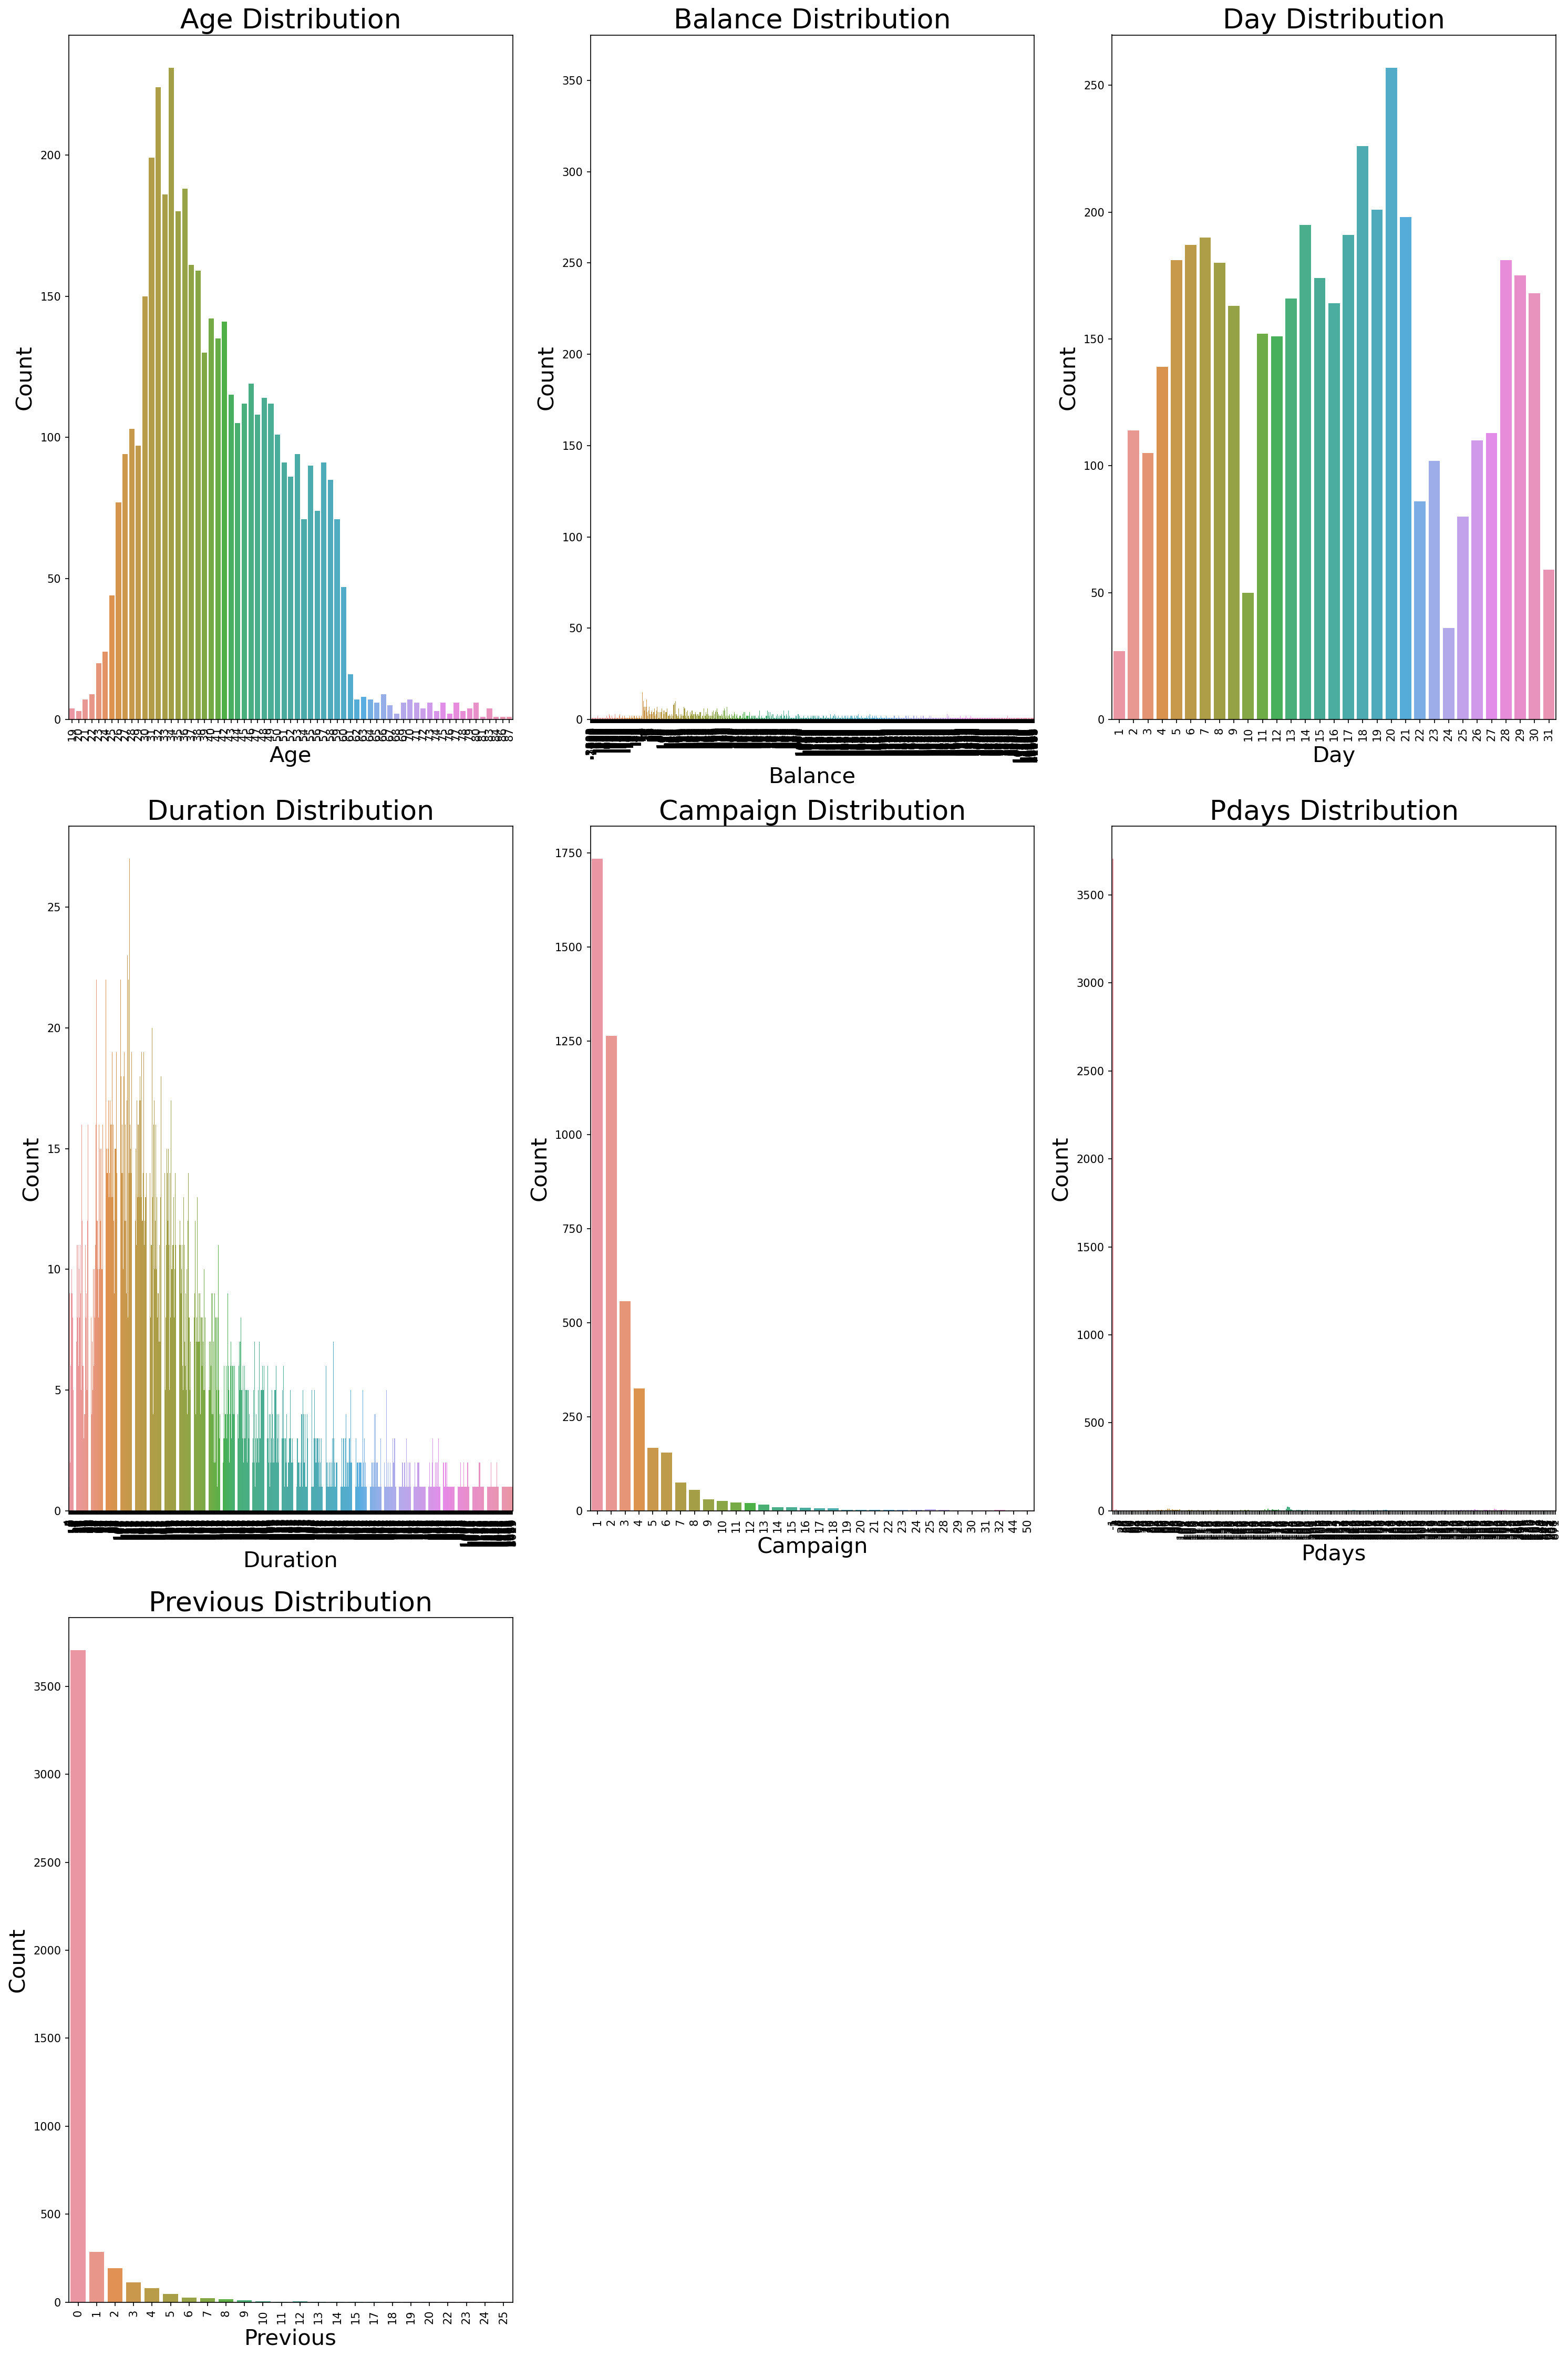

In [25]:
# numerical features

# age
plt.figure(figsize=(20, 30), dpi=150)
plt.subplot(3,3,1)
sns.countplot(df['age'])
plt.title("Age Distribution", fontsize = 25)
plt.xlabel("Age",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 'vertical')

# balance
plt.subplot(3,3,2)
sns.countplot(df['balance'])
plt.title("Balance Distribution", fontsize = 25)
plt.xlabel("Balance",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 'vertical')

# day
plt.subplot(3,3,3)
sns.countplot(df['day'])
plt.title("Day Distribution", fontsize = 25)
plt.xlabel("Day",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 'vertical')

# duration
plt.subplot(3,3,4)
sns.countplot(df['duration'])
plt.title("Duration Distribution", fontsize = 25)
plt.xlabel("Duration",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 'vertical')

# campaign
plt.subplot(3,3,5)
sns.countplot(df['campaign'])
plt.title("Campaign Distribution", fontsize = 25)
plt.xlabel("Campaign",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 'vertical')

# pdays
plt.subplot(3,3,6)
sns.countplot(df['pdays'])
plt.title("Pdays Distribution", fontsize = 25)
plt.xlabel("Pdays",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 'vertical')

# previous
plt.subplot(3,3,7)
sns.countplot(df['previous'])
plt.title("Previous Distribution", fontsize = 25)
plt.xlabel("Previous",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tight_layout()
plt.show()

## Features Vs Target

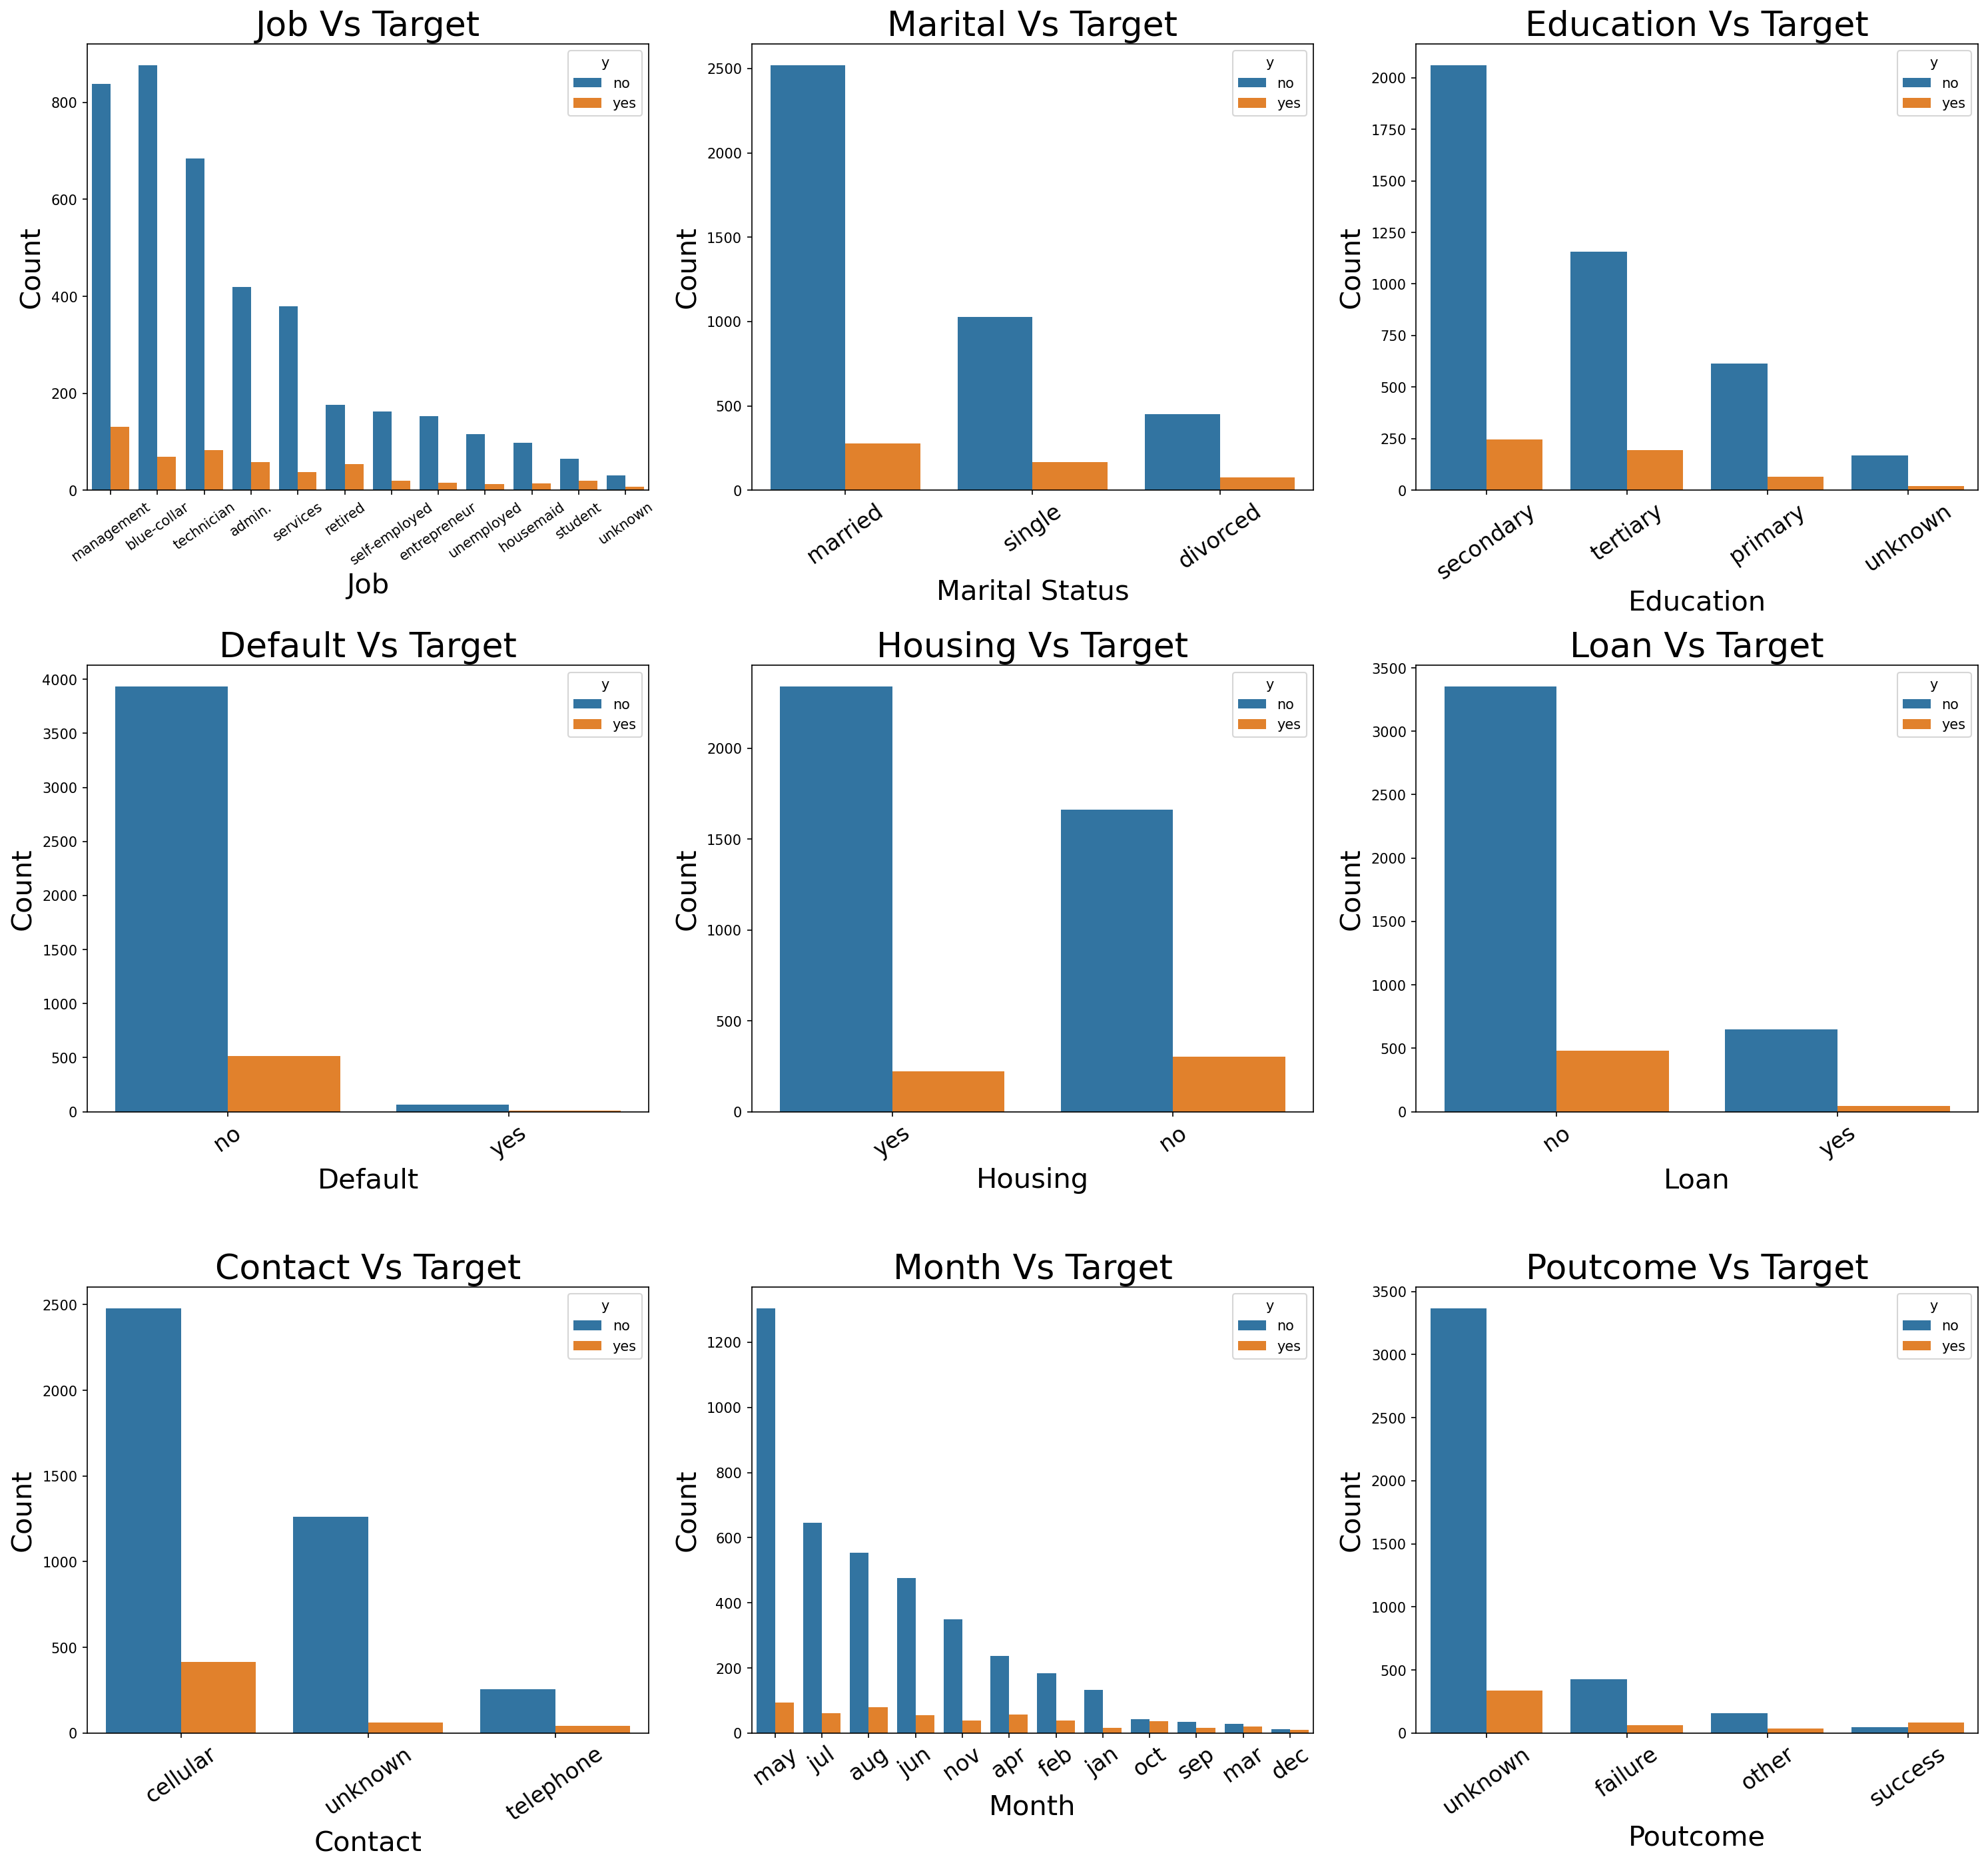

In [26]:
# categorical features

# job vs y
plt.figure(figsize=(20, 30), dpi=150)
plt.subplot(5,3,1)
sns.countplot(df['job'], hue= df['y'],order=df.job.value_counts().index)
plt.title("Job Vs Target", fontsize = 25)
plt.xlabel("Job",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 35)

# marital vs y
plt.subplot(5,3,2)
sns.countplot(df['marital'],hue= df['y'],order=df.marital.value_counts().index)
plt.title("Marital Vs Target", fontsize = 25)
plt.xlabel("Marital Status",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 35,fontsize = 16)

# education vs y
plt.subplot(5,3,3)
sns.countplot(df['education'],hue= df['y'],order=df.education.value_counts().index)
plt.title("Education Vs Target", fontsize = 25)
plt.xlabel("Education",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 35,fontsize = 16)

# default vs y
plt.subplot(5,3,4)
sns.countplot(df['default'],hue= df['y'],order=df.default.value_counts().index)
plt.title("Default Vs Target", fontsize = 25)
plt.xlabel("Default",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 35,fontsize = 16)

# housing vs y
plt.subplot(5,3,5)
sns.countplot(df['housing'],hue= df['y'],order=df.housing.value_counts().index)
plt.title("Housing Vs Target", fontsize = 25)
plt.xlabel("Housing",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 35,fontsize = 16)

# loan vs y
plt.subplot(5,3,6)
sns.countplot(df['loan'],hue= df['y'],order=df.loan.value_counts().index)
plt.title("Loan Vs Target", fontsize = 25)
plt.xlabel("Loan",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 35,fontsize = 16)

# contact vs y
plt.subplot(5,3,7)
sns.countplot(df['contact'],hue= df['y'],order=df.contact.value_counts().index)
plt.title("Contact Vs Target", fontsize = 25)
plt.xlabel("Contact",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 35,fontsize = 16)

# month vs y
plt.subplot(5,3,8)
sns.countplot(df['month'],hue= df['y'],order=df.month.value_counts().index)
plt.title("Month Vs Target", fontsize = 25)
plt.xlabel("Month",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 35,fontsize = 16)

# poutcome vs y
plt.subplot(5,3,9)
sns.countplot(df['poutcome'],hue= df['y'],order=df.poutcome.value_counts().index)
plt.title("Poutcome Vs Target", fontsize = 25)
plt.xlabel("Poutcome",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation = 35,fontsize = 16)

plt.tight_layout()
plt.show()

# Feature Engineering

In [27]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [28]:
# create copy of dataframe before doing any changes
df2 = df.copy()

In [29]:
# drop unuseful columns  

# I am going to drop 4 columns that have no uses,  
# contact type does not make any effect to target, 
# day and month have same data as pdays, 
# and in poutcome column comes with a high amount of unknown values 
# thats why I am going to drop this columns

df2.drop(['contact','day','month','poutcome'], axis = 1, inplace = True)

In [30]:
# find and replace unknown values with nan

# unknown values does not comes with any information, 
# so we can replace it with appropriate values

for i in df2.columns:
    df2[i] = np.where(df2[i] == "unknown", np.nan, df2[i])
df2.isna().sum()

age            0
job           38
marital        0
education    187
default        0
balance        0
housing        0
loan           0
duration       0
campaign       0
pdays          0
previous       0
y              0
dtype: int64

In [31]:
# fill na with forward fill method
df2.fillna(method='ffill', inplace=True)

In [32]:
# data encoding
job = pd.get_dummies(df2['job'],drop_first=True)
df2['education'] = df2['education'].map({'primary':0,'secondary':1,'tertiary':2})
df2["default"] = df2["default"].map({'no':0, 'yes':1})
df2["marital"] = df2["marital"].map({'single':0, 'married':1, 'divorced':2})
df2["housing"] = df2["housing"].map({'no':0, 'yes':1})
df2["loan"] = df2["loan"].map({'no':0, 'yes':1})
df2["y"] = df2["y"].map({'no':0, 'yes':1})

In [33]:
# new dataframe after encoding
df2 = pd.concat([df2,job],axis = 1)
df2.drop('job',axis = 1, inplace = True)
df2.head()

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,30.0,1,0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,1
1,33.0,1,1,0,4789.0,1,1,220.0,1.0,339.0,4.0,0,0,0,0,0,0,0,1,0,0,0
2,35.0,0,2,0,1350.0,1,0,185.0,1.0,330.0,1.0,0,0,0,0,1,0,0,0,0,0,0
3,30.0,1,2,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0,0,0,0,1,0,0,0,0,0,0
4,59.0,1,1,0,0.0,1,0,226.0,1.0,-1.0,0.0,0,1,0,0,0,0,0,0,0,0,0


# Data Spliting

In [34]:
# split dependent and independent variables
X = df2.drop('y',axis = 1)
y = df2['y']

# Data Balancing

In [35]:
# data balance with smotetomek
from imblearn.over_sampling import SMOTE
smt = SMOTE(sampling_strategy=0.80)
X, y = smt.fit_resample(X, y)

In [36]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Data Scaling

In [37]:
# data scaling with standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Building

In [38]:
# train models and check accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

ml_models = [("Logistic Regression",LogisticRegression()),
       ("KNN Classifier", KNeighborsClassifier()),
       ("RandomForest",RandomForestClassifier()),
      ("AdaBoost",AdaBoostClassifier()),
      ("XGBoost",XGBClassifier())]
for name,model in ml_models:
    model.fit(X_train,y_train)
    y_pred1 = model.predict(X_train)
    train_acc = roc_auc_score(y_train,y_pred1)
    y_pred2 = model.predict(X_test)
    test_acc = roc_auc_score(y_test,y_pred2)
    print(f"For {name}:-\nThe Training Accuracy is: {train_acc}\nThe Testing Accuracy is: {test_acc}")
    print("--"*40)

For Logistic Regression:-
The Training Accuracy is: 0.8717091142505091
The Testing Accuracy is: 0.8899856801161263
--------------------------------------------------------------------------------
For KNN Classifier:-
The Training Accuracy is: 0.9113917488108525
The Testing Accuracy is: 0.8925372052523217
--------------------------------------------------------------------------------
For RandomForest:-
The Training Accuracy is: 1.0
The Testing Accuracy is: 0.9316014958499763
--------------------------------------------------------------------------------
For AdaBoost:-
The Training Accuracy is: 0.8934942439195289
The Testing Accuracy is: 0.904343763406526
--------------------------------------------------------------------------------
For XGBoost:-
The Training Accuracy is: 0.9941941493439789
The Testing Accuracy is: 0.9336143112645182
--------------------------------------------------------------------------------


**We Can Clearly See XG Boost Classifier Is Giving The Best Result, So Will Take XG Boost Classifier As Our Final Model**

In [39]:
# find model best parameters
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBClassifier()
parameters = {"n_estimators": [50,100,150,200,250,300,350,400],
             "max_depth": np.arange(2,10),
             "learning_rate": np.arange(0.01,0.1,0.02),
             'subsample': np.arange(0.5, 1.0, 0.1),
             'colsample_bytree': np.arange(0.4, 1.0, 0.1),
             'colsample_bylevel': np.arange(0.4, 1.0, 0.1)}
ran_xgb = RandomizedSearchCV(xgb, parameters, cv = 5, random_state= 42)
ran_xgb.fit(X_train,y_train)
ran_xgb.best_params_

{'subsample': 0.7999999999999999,
 'n_estimators': 250,
 'max_depth': 8,
 'learning_rate': 0.08999999999999998,
 'colsample_bytree': 0.7,
 'colsample_bylevel': 0.8999999999999999}

# Tune Model With Best Parameters

In [40]:
# tune model
xgb = XGBClassifier(subsample = 0.79, n_estimators = 250,
                    max_depth = 8, learning_rate = 0.09,
                    colsample_bytree = 0.7, colsample_bylevel = 0.89)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
score = roc_auc_score(y_test,y_pred)*100
score

93.27425809876605

**We Are Getting More Then 93% Of Accuracy Score With XG Boost Model**

In [41]:
# feature impotance
feature_importance = pd.DataFrame({'Feature Importance':xgb.feature_importances_*100},index = X.columns)
feature_importance = feature_importance['Feature Importance'].sort_values(ascending=False)
feature_importance

blue-collar      9.752260
loan             9.573754
services         8.508756
housing          8.482265
technician       7.248700
entrepreneur     6.459834
unemployed       5.768193
self-employed    5.653130
management       4.655123
duration         4.508718
housemaid        4.397371
campaign         4.004121
pdays            3.612414
student          3.213658
previous         3.109900
retired          3.098051
marital          2.068802
education        1.562309
balance          1.510022
default          1.449628
age              1.362989
Name: Feature Importance, dtype: float32

# Check Performance Of Model

In [42]:
# create dummy data for check performance of model
dummy = np.array([40,1,0,0,17.0,0,0,79.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,1]).reshape(1,-1)

In [43]:
# scale dummy data
dummy = sc.transform(dummy)

In [44]:
# check prediction of dummy data
xgb.predict(dummy)

array([0])

**We Can See, We Are Getting Good Prediction With Our Final Model**

In [45]:
# create pickle file of model and scaler
import pickle as pkl
pkl.dump(xgb,open('model.pkl','wb'))
pkl.dump(sc,open('scaler.pkl','wb'))

# Important Points:-

1. Dataset was pretty clean, I did not need to clean it but the dataset was imbalanced.
2. I Found some amount of outliers in some columns but the dataset was imbalanced that's why I did not clean it.
3. There were 4 unuseful columns present and I removed them.
4. I removed the day and month columns because they contained the same value as pdays column.
5. I removed poutcome column because it contained much amount of unknown values.
6. I removed the contact column because it was not making any impact on the target column.
7. I did label encoding for most of the categorical columns and did one-hot encoding for the job column.
8. After feature engineering I had split dependent and independent values.
9. After scaling I balanced the data with the SMOT library (over sampling).
10. After that I did the train test split.
11. Then did data scaling.
12. After that train different - different ML models with training data and check train and test scores.
13. After that take the best model (XG Boost) and find the best parameters.
14. After that train model and tune it and did a prediction.
15. Then check the performance of the model by passing random values.
16. I got XG Boost as best model and I used Auroc Score for checking performance / accuracy because our data was imbalanced.

**I Hope You Will Like My Work**

**Thank You :)**